## Predicting Emotions of News Contents Using Sentiment Analysis (5 points)

- In this question, we will apply sentiment analysis on financial news headlines from a given data set.

- By doing so, we can understand the emotion behind the headlines and predict whether the market is being positive or negative toward a stock.

In [ ]:
###(1) Import the necessary library and load the news_data csv file.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')
import os
import pandas as pd

Mounted at /content/gdrive/


In [ ]:
news = pd.read_csv('/CIS 4120 - NLP/Assignment 2/news_data.csv')

In [ ]:
news.head()

,ticker,date,time,headline
0,fb,Jan-04-19,06:22PM,"Facebook, Apple, Netflix, Amazon and Alphabet ..."
1,fb,Jan-04-19,05:15PM,Earnings Reports for the Week of Jan. 7-11 (BB...
2,fb,Jan-04-19,04:55PM,COLUMN-Commentary: 2019 will be the year of mo...
3,fb,Jan-04-19,04:53PM,3 Tech Trends to Watch in 2019
4,fb,Jan-04-19,04:30PM,Will Denver's tech growth continue in 2019?


In [ ]:
###(2) Use VADER Sentiment Analyer and derive pos/neu/neg/compound sentiment scores for every news headlines.
###(3) Merge the sentiment outputs to the existing data set.
### As a result, you will have 500rows & 8 cloumns in your data set such as ticker, date, time, headline, pos,neu,neg,compound.

In [ ]:
### Pre-process and cleaning the data
import regex as re

def cleaner(text):
  text = re.sub('[^A-Za-z]+', ' ', text)
  return text

news['clean_headline'] = news['headline'].apply(cleaner)
news['clean_headline'] = news['clean_headline'].str.lower()

### Tokenize
from nltk.tokenize import regexp_tokenize
from nltk import RegexpTokenizer

re_tk = RegexpTokenizer("[\w]+")

news['clean_headline'] = news['clean_headline'].map(re_tk.tokenize)

### Remove stopwords
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk_stop = stopwords.words('english')

news['clean_headline'] = news['clean_headline'].apply(lambda text: [word for word in text if word not in nltk_stop and len(word) > 2])

### Lemmatize
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

def get_pos_tags(word):
    """Map PoS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, #adjective
                "N": wordnet.NOUN,#noun
                "V": wordnet.VERB,#verb
                "R": wordnet.ADV} #adverb

    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_text(text):
  text=[WordNetLemmatizer().lemmatize(w, get_pos_tags(w)) for w in text]
  return text

news['clean_headline'] = news['clean_headline'].apply(lemmatize_text)

### Rejoin into string
news['clean_headline_join'] = news['clean_headline'].apply(lambda word: (' '.join(word)))

news.head(20)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,ticker,date,time,headline,clean_headline,clean_headline_join
0,fb,Jan-04-19,06:22PM,"Facebook, Apple, Netflix, Amazon and Alphabet ...","[facebook, apple, netflix, amazon, alphabet, p...",facebook apple netflix amazon alphabet power f...
1,fb,Jan-04-19,05:15PM,Earnings Reports for the Week of Jan. 7-11 (BB...,"[earnings, report, week, jan, bbby, kbh]",earnings report week jan bbby kbh
2,fb,Jan-04-19,04:55PM,COLUMN-Commentary: 2019 will be the year of mo...,"[column, commentary, year, state, control]",column commentary year state control
3,fb,Jan-04-19,04:53PM,3 Tech Trends to Watch in 2019,"[tech, trend, watch]",tech trend watch
4,fb,Jan-04-19,04:30PM,Will Denver's tech growth continue in 2019?,"[denver, tech, growth, continue]",denver tech growth continue
5,fb,Jan-04-19,02:46PM,Facebook to Prioritize Video in 2019,"[facebook, prioritize, video]",facebook prioritize video
6,fb,Jan-04-19,01:52PM,ScotteVest CEO: How a Facebook Passion Project...,"[scottevest, ceo, facebook, passion, project, ...",scottevest ceo facebook passion project evolve...
7,fb,Jan-04-19,01:47PM,"Millennials Load Up on Battered Apple, Faceboo...","[millennials, load, batter, apple, facebook]",millennials load batter apple facebook
8,fb,Jan-04-19,01:00PM,FAANGs See a Weak Start to 2019: More Pain Ahe...,"[faangs, see, weak, start, pain, ahead, etf]",faangs see weak start pain ahead etf
9,fb,Jan-04-19,12:18PM,U[PDATE: Netflix shares soar 9% as Goldman add...,"[pdate, netflix, share, soar, goldman, add, st...",pdate netflix share soar goldman add stock con...


In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.2 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Vader sentiment function
def vader_score(text):
  return analyzer.polarity_scores(text)

news['vader_score'] = news['clean_headline_join'].apply(vader_score)

# Seperate vader_score into 4 different columns pos,neu,neg,compound.
news['vader_pos'] = news['vader_score'].apply(lambda vader_dict: vader_dict['pos'])
news['vader_neu'] = news['vader_score'].apply(lambda vader_dict: vader_dict['neu'])
news['vader_neg'] = news['vader_score'].apply(lambda vader_dict: vader_dict['neg'])
news['vader_compound'] = news['vader_score'].apply(lambda vader_dict: vader_dict['compound'])

news_final = news[['ticker', 'date','time','headline','vader_pos','vader_neu','vader_neg','vader_compound']]

print()
print(news.shape) # contains 11 columns, 3 are from the previous steps and
print()
print(news_final.shape)
news_final[0:20:]


(500, 11)

(500, 8)


,ticker,date,time,headline,vader_pos,vader_neu,vader_neg,vader_compound
0,fb,Jan-04-19,06:22PM,"Facebook, Apple, Netflix, Amazon and Alphabet ...",0.459,0.541,0.000,0.6249
1,fb,Jan-04-19,05:15PM,Earnings Reports for the Week of Jan. 7-11 (BB...,0.000,1.000,0.000,0.0000
2,fb,Jan-04-19,04:55PM,COLUMN-Commentary: 2019 will be the year of mo...,0.000,1.000,0.000,0.0000
3,fb,Jan-04-19,04:53PM,3 Tech Trends to Watch in 2019,0.000,1.000,0.000,0.0000
4,fb,Jan-04-19,04:30PM,Will Denver's tech growth continue in 2019?,0.464,0.536,0.000,0.3818
5,fb,Jan-04-19,02:46PM,Facebook to Prioritize Video in 2019,0.000,1.000,0.000,0.0000
6,fb,Jan-04-19,01:52PM,ScotteVest CEO: How a Facebook Passion Project...,0.300,0.700,0.000,0.4588
7,fb,Jan-04-19,01:47PM,"Millennials Load Up on Battered Apple, Faceboo...",0.000,1.000,0.000,0.0000
8,fb,Jan-04-19,01:00PM,FAANGs See a Weak Start to 2019: More Pain Ahe...,0.000,0.446,0.554,-0.7351
9,fb,Jan-04-19,12:18PM,U[PDATE: Netflix shares soar 9% as Goldman add...,0.216,0.784,0.000,0.2960


In [ ]:
### (4) Visualize your outputs for one single day for one particular stock.
### Pick one of the tickers, say fb, and a certain date, say 2019 Jan 03, and
### plot how the news sentiment (pos,neu,neg this time) changes over time within that day.
### you can generate separate plots for each sentiment category and overlay the plots all together at once.
### Although there's no one exact way to do this, such plot may work, refer plot 2 (it's called "stacked" bar chart).

In [ ]:
#One way to create a sub-data set for (4):
#take out fb ticker only, keep the rows where date is Jan 03 2019.
#Sort the rows by time and based on the final version, generate a plot.

In [ ]:
# Find all unique tickers
print(news['ticker'].unique())

# Find dates
print(news['date'].unique())
print()

# Choosing fb, so find all dates with fb news
news['date'].loc[news['ticker'] == 'fb'].unique()

['fb' 'tsla']
['Jan-04-19' 'Jan-03-19' 'Jan-02-19' 'Jan-01-19' 'Dec-31-18' 'Dec-30-18'
 'Dec-29-18' 'Dec-28-18' 'Sep-22-18' 'Sep-21-18' 'Sep-20-18' 'Sep-19-18'
 'Sep-18-18' 'Nov-26-18' 'Nov-25-18' 'Nov-23-18' 'Nov-22-18' 'Nov-21-18'
 'Nov-20-18' 'Nov-19-18' 'Nov-18-18' 'Nov-17-18' 'Nov-16-18']



array(['Jan-04-19', 'Jan-03-19', 'Jan-02-19', 'Jan-01-19', 'Dec-31-18',
       'Dec-30-18', 'Dec-29-18', 'Dec-28-18', 'Sep-22-18', 'Sep-21-18',
       'Sep-20-18', 'Sep-19-18', 'Sep-18-18'], dtype=object)

In [ ]:
# Choosing fb on Sep-19-18
fb_091918 = news.loc[(news['ticker'] == 'fb') & (news['date'] == 'Sep-19-18')]
print(fb_091918.shape)
fb_091918

(25, 11)


,ticker,date,time,headline,clean_headline,clean_headline_join,vader_score,vader_pos,vader_neu,vader_neg,vader_compound
153,fb,Sep-19-18,09:00PM,eMarketer: Amazon Just Became the Third-Larges...,"[emarketer, amazon, become, third, large, digi...",emarketer amazon become third large digital pl...,"{'neg': 0.0, 'neu': 0.779, 'pos': 0.221, 'comp...",0.221,0.779,0.000,0.1779
154,fb,Sep-19-18,08:38PM,"Facebook expands fake election news fight, but...","[facebook, expands, fake, election, news, figh...",facebook expands fake election news fight fals...,"{'neg': 0.435, 'neu': 0.458, 'pos': 0.107, 'co...",0.107,0.458,0.435,-0.6486
155,fb,Sep-19-18,08:08PM,"Like Facebook, Apple Wants to Create a &quot;T...","[like, facebook, apple, want, create, quot, tr...",like facebook apple want create quot trust sco...,"{'neg': 0.0, 'neu': 0.352, 'pos': 0.648, 'comp...",0.648,0.352,0.000,0.8020
156,fb,Sep-19-18,07:03PM,"Facebook expands fake election news fight, but...","[facebook, expands, fake, election, news, figh...",facebook expands fake election news fight fals...,"{'neg': 0.435, 'neu': 0.458, 'pos': 0.107, 'co...",0.107,0.458,0.435,-0.6486
157,fb,Sep-19-18,06:35PM,Why Did Facebook (FB) Stock Climb Wednesday?,"[facebook, stock, climb, wednesday]",facebook stock climb wednesday,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
158,fb,Sep-19-18,05:54PM,Macy's partners with Facebook to bring virtual...,"[macy, partner, facebook, bring, virtual, real...",macy partner facebook bring virtual reality store,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
159,fb,Sep-19-18,05:45PM,Facebook (FB) Outpaces Stock Market Gains: Wha...,"[facebook, outpaces, stock, market, gain, know]",facebook outpaces stock market gain know,"{'neg': 0.0, 'neu': 0.595, 'pos': 0.405, 'comp...",0.405,0.595,0.000,0.5267
160,fb,Sep-19-18,04:19PM,This Is Why the S&P 500 Will Rally Big Into th...,"[rally, big, end]",rally big end,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
161,fb,Sep-19-18,04:04PM,Closing Bell: LIVE MARKETS BLOG,"[closing, bell, live, market, blog]",closing bell live market blog,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
162,fb,Sep-19-18,04:02PM,5 Top Stock Trades for Thursday Trading FANG ...,"[top, stock, trade, thursday, trading, fang, s...",top stock trade thursday trading fang stock ti...,"{'neg': 0.0, 'neu': 0.795, 'pos': 0.205, 'comp...",0.205,0.795,0.000,0.2023


In [ ]:
# Convert the 'time' column to datetime objects so they can be sorted
fb_091918['time'] = pd.to_datetime(fb_091918['time'], format = '%I:%M%p').dt.time

fb_091918 = fb_091918.sort_values(by = 'time', ascending = True)
fb_091918

<ipython-input-12-6717d6927e7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb_091918['time'] = pd.to_datetime(fb_091918['time'], format = '%I:%M%p').dt.time


,ticker,date,time,headline,clean_headline,clean_headline_join,vader_score,vader_pos,vader_neu,vader_neg,vader_compound
177,fb,Sep-19-18,06:00:00,Amazon Increases Ad Market Share at Expense of...,"[amazon, increase, market, share, expense, goo...",amazon increase market share expense google fa...,"{'neg': 0.0, 'neu': 0.392, 'pos': 0.608, 'comp...",0.608,0.392,0.000,0.6369
176,fb,Sep-19-18,07:40:00,Amazon makes headway in breaking up Facebook a...,"[amazon, make, headway, break, facebook, googl...",amazon make headway break facebook google digi...,"{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'comp...",0.195,0.805,0.000,0.1779
175,fb,Sep-19-18,09:19:00,FINAL DEADLINE ALERT: Brower Piven Reminds Sha...,"[final, deadline, alert, brower, piven, remind...",final deadline alert brower piven reminds shar...,"{'neg': 0.16, 'neu': 0.646, 'pos': 0.194, 'com...",0.194,0.646,0.160,0.2263
174,fb,Sep-19-18,10:14:00,These are the 10 most relevant brands to consu...,"[relevant, brand, consumersfacebook, twitter, ...",relevant brand consumersfacebook twitter snapc...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
173,fb,Sep-19-18,10:17:00,Amazon to become the third largest digital ad ...,"[amazon, become, third, large, digital, platform]",amazon become third large digital platform,"{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.254,0.746,0.000,0.1779
172,fb,Sep-19-18,10:24:00,Job postings suggest Facebook could be develop...,"[job, posting, suggest, facebook, could, devel...",job posting suggest facebook could develop hou...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
171,fb,Sep-19-18,10:40:00,New Alexa Devices Can Power Amazon Stock and ...,"[new, alexa, device, power, amazon, stock, hur...",new alexa device power amazon stock hurt rival,"{'neg': 0.306, 'neu': 0.541, 'pos': 0.153, 'co...",0.153,0.541,0.306,-0.4019
170,fb,Sep-19-18,10:45:00,Amazon's Ad Business Moves Up to Third in U.S....,"[amazon, business, move, third, market, share]",amazon business move third market share,"{'neg': 0.0, 'neu': 0.506, 'pos': 0.494, 'comp...",0.494,0.506,0.000,0.4404
169,fb,Sep-19-18,10:56:00,"Amazon Gains Ad Market Share From Google, Face...","[amazon, gain, market, share, google, facebook]",amazon gain market share google facebook,"{'neg': 0.0, 'neu': 0.291, 'pos': 0.709, 'comp...",0.709,0.291,0.000,0.7430
168,fb,Sep-19-18,14:01:00,Facebook accused of discriminating against wom...,"[facebook, accuse, discriminate, woman, male, ...",facebook accuse discriminate woman male target...,"{'neg': 0.205, 'neu': 0.795, 'pos': 0.0, 'comp...",0.000,0.795,0.205,-0.2023


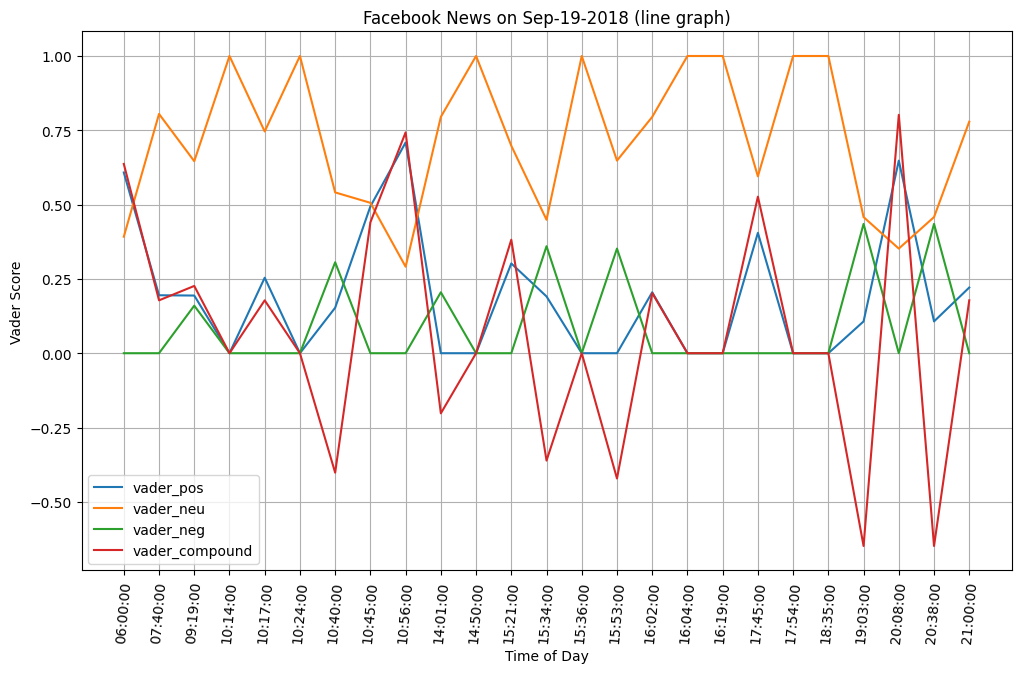

In [ ]:
### plot how the news sentiment (pos,neu,neg this time) changes over time within that day.
### you can generate separate plots for each sentiment category and overlay the plots all together at once.
### Although there's no one exact way to do this, such plot may work, refer plot 2 (it's called "stacked" bar chart).

import matplotlib.pyplot as plt
fig41 = plt.figure(figsize = (12,7))

# Convert the date time objects into a string objects so matplotlib can read it
plt_time = [str(time) for time in fb_091918['time']]

plt.plot(plt_time, fb_091918['vader_pos'], label = 'vader_pos')
plt.plot(plt_time, fb_091918['vader_neu'], label = 'vader_neu')
plt.plot(plt_time, fb_091918['vader_neg'], label = 'vader_neg')
plt.plot(plt_time, fb_091918['vader_compound'], label = 'vader_compound')

plt.title('Facebook News on Sep-19-2018 (line graph)')
plt.xlabel('Time of Day')
plt.xticks(rotation = 85)
plt.ylabel('Vader Score')
plt.legend()

plt.grid(True)
# plt.tight_layout()
plt.show()

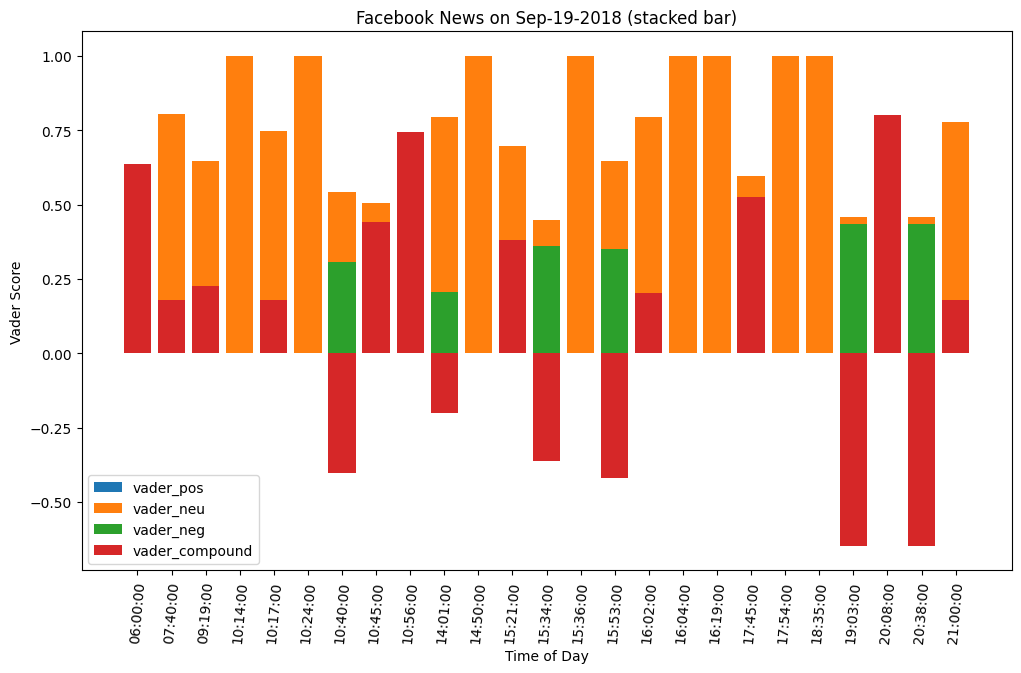

In [ ]:
fig42 = plt.figure(figsize = (12,7))

plt.bar(plt_time, fb_091918['vader_pos'], label = 'vader_pos')
plt.bar(plt_time, fb_091918['vader_neu'], label = 'vader_neu')
plt.bar(plt_time, fb_091918['vader_neg'], label = 'vader_neg')
plt.bar(plt_time, fb_091918['vader_compound'], label = 'vader_compound')

plt.title('Facebook News on Sep-19-2018 (stacked bar)')
plt.xlabel('Time of Day')
plt.xticks(rotation = 85)
plt.ylabel('Vader Score')
plt.legend()

# plt.grid(True)
# plt.tight_layout()
plt.show()

In [ ]:
### (5) Visualize your outputs to see how the news sentiment of each ticker changes over time.
### Generate time trend plot for the average of compound scores for both tickers at a daily-level.
### X axis should be date from the oldest to the newest & Y axis should be the average of compound scores.

In [ ]:
# New df just for vader_compound scores
news_comp = news[['ticker', 'date', 'time', 'vader_compound']]

# Use reset_index() so the index is not the date column
news_comp_avg = pd.DataFrame(news_comp.groupby(['ticker','date'])['vader_compound'].mean().reset_index())
news_comp_avg = news_comp_avg.sort_values('date', ascending = True)

# Create a df for each ticker for easy selection in matplotlib
fb_comp_avg = news_comp_avg.loc[news_comp_avg['ticker'] == 'fb']
fb_comp_avg = news_comp_avg.sort_values('date', ascending = True)
tsla_comp_avg = news_comp_avg.loc[news_comp_avg['ticker'] == 'tsla']
tsla_comp_avg = news_comp_avg.sort_values('date', ascending = True)

# news_comp_avg

print(fb_comp_avg.head())
print()
print(tsla_comp_avg.head())

  ticker       date  vader_compound
0     fb  Dec-28-18       -0.095482
1     fb  Dec-29-18        0.016667
2     fb  Dec-30-18        0.173817
3     fb  Dec-31-18        0.000073
4     fb  Jan-01-19        0.292633

  ticker       date  vader_compound
0     fb  Dec-28-18       -0.095482
1     fb  Dec-29-18        0.016667
2     fb  Dec-30-18        0.173817
3     fb  Dec-31-18        0.000073
4     fb  Jan-01-19        0.292633


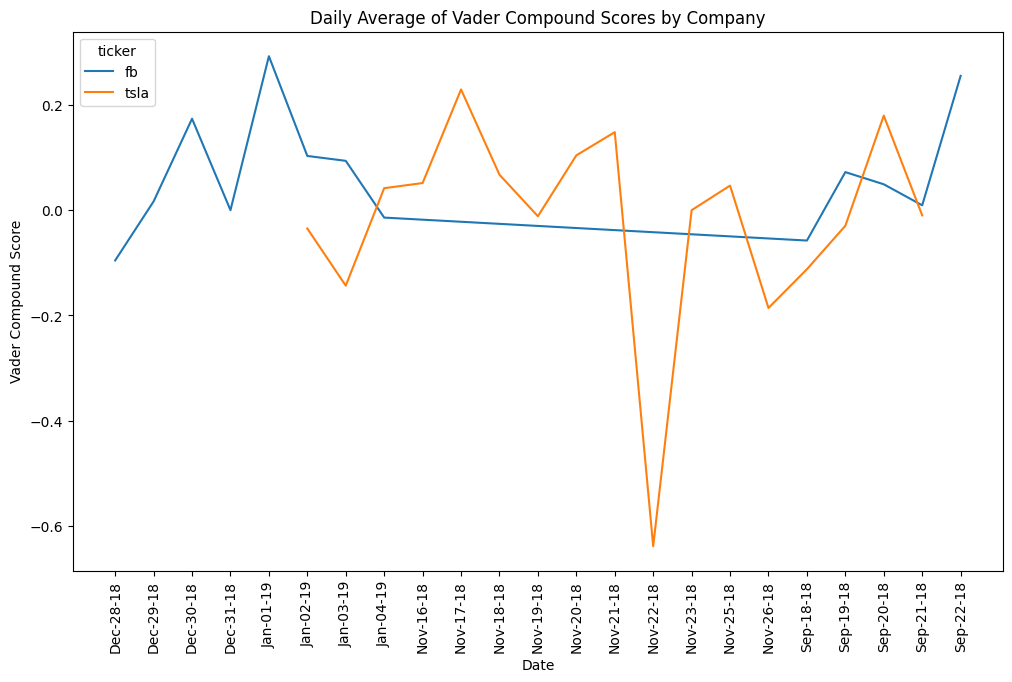

In [ ]:
# Create a lineplot with 2 lines
import seaborn as sns

fig_5 = plt.figure(figsize = (12,7))

sns.lineplot(x = 'date', y = 'vader_compound', hue = 'ticker', data = news_comp_avg)
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Vader Compound Score')
plt.title('Daily Average of Vader Compound Scores by Company')


plt.show()